<a href="https://colab.research.google.com/github/rccrdmr/MAT422-Mathematics-for-DataScience/blob/main/3.5-6_K-Means_and_Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.5 K-Means

K-means clustering is a popular vector quantization method that partitions $n$ observations into $k$ clusters. Each observation belongs to the cluster with the nearest mean (centroid), which serves as a prototype for the cluster. The method aims to minimize the within-cluster variances (squared Euclidean distances), but not regular Euclidean distances. While k-means general converge quickly to a local optimumm the problem is computationally difficult (NP-hard).
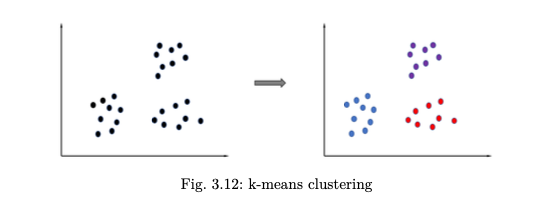


#### Objective Function

Given $ x_1, x_2, \ldots, x_n $ as $ d $-dimensional real vectors, K-means seeks to minimize the within-cluster sum of squares (WCSS):

$$
\text{WCSS}_i = \sum_{x \in S_i} \|x - \mu(S_i)\|^2,
$$

where $ \mu(S_i) $ is the mean of points in $ S_i $:

$$
\mu(S_i) = \frac{1}{|S_i|} \sum_{x \in S_i} x.
$$

The objective is:

$$
\arg \min_{S} \sum_{i=1}^{k} \text{WCSS}_i.
$$

#### K-means Clustering Algorithm:


1. Initialize $ k $ cluster centers randomly.
2. Assign each point to the nearest cluster center based on Euclidean distance.
3. Compute the centroid for each cluster.
4. Repeat steps 2 and 3 until no points change clusters between iterations.

#### Convergence Proof

K-means converges because $ \sum_{i=1}^{k} \text{WCSS}_i $ decreases in each iteration:

- **Reassignment Step**: Each vector is assigned to the closest centroid, decreasing the total WCSS.
- **Recomputation Step**: The new centroid $ \mu(S_i) $ minimizes $ \text{WCSS}_i $.

The centroid $ v $ that minimizes $ \text{WCSS}_i $ is:

$$
v = \frac{1}{|S_i|} \sum_{x \in S_i} x.
$$

Hence, the objective $ \sum_{i=1}^{k} \text{WCSS}_i $ monotonically decreases, ensuring convergence.

# 3.6 Support Vector Machine

Support-vector machines (SVMs) are supervised learning models used for classification and regression analysis. The goal is to find a hyperplane that separates data points of different classes with the maximum margin.


#### Problem Setup

Given a training dataset of $ n $ points of the form:

$$
(x_1, y_1), \ldots, (x_n, y_n),
$$

where $ y_i \in \{-1, 1\} $ indicates the class of point $ x_i $, and $ x_i $ is a $ p $-dimensional real vector. The objective is to find a hyperplane:

$$
w^T x - b = 0,
$$

where $ w $ is the normal vector to the hyperplane.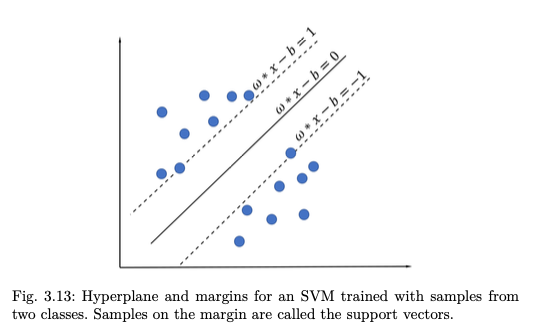

#### Margin and Constraints


For linearly separable data, select two parallel hyperplanes such that:

$$
w^T x - b = 1 \quad \text{and} \quad w^T x - b = -1.
$$

The margin is the distance between these two hyperplanes, and it should be maximized. We require:

- For $ y_i = 1 $: $ w^T x_i - b \geq 1 $.
- For $ y_i = -1 $: $ w^T x_i - b \leq -1 $.

These can be combined into:

$$
y_i (w^T x_i - b) \geq 1, \quad \text{for all } i.
$$

#### Optimization Problem

To maximize the margin, we minimize $ \|w\| $, subject to the constraints:

$$
\min_{w, b} \left\{ \lambda \|w\|^2 + \frac{1}{n} \sum_{i=1}^{n} \max\{0, 1 - y_i (w^T x_i - b)\} \right\},
$$

where $ \lambda $ is a regularization parameter.

#### Gradient Descent Solution

The unconstrained optimization can be solved using gradient descent. The updates are defined as follows:

- Update $ b $:
  $$
  \text{New } b = \text{Old } b - \beta \times \left\{
  \begin{array}{ll}
  y_i, & \text{if } 1 - y_i (w^T x_i - b) > 0 \\
  0, & \text{otherwise}
  \end{array}
  \right.
  $$

- Update $ w $:
  $$
  \text{New } w = \text{Old } w - \beta \times \left\{
  \begin{array}{ll}
  2\lambda w - \frac{1}{n} y_i x_i, & \text{if } 1 - y_i (w^T x_i - b) > 0 \\
  2\lambda w, & \text{otherwise}
  \end{array}
  \right.
  $$


#### Key Points

- The optimization problem is convex with respect to $ w $, allowing gradient descent methods to find the minimum efficiently.
- The parameter $ \lambda $ controls the trade-off between maximizing the margin and minimizing classification errors.
